In [61]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [62]:
df = fdr.DataReader('000660', '2010')
df = df.dropna()
df = df.loc[df['High'] != 0]
df.head(150)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2010-01-04,23350,24150,23350,24100,7346425,0.041037
2010-01-05,24500,24900,23050,23350,12118281,-0.031120
2010-01-06,23700,24550,23600,24550,7731186,0.051392
2010-01-07,25000,25200,24350,24400,11084814,-0.006110
2010-01-08,24650,24850,23450,24650,9695685,0.010246
...,...,...,...,...,...,...
2010-08-02,22550,22650,21500,21600,18732935,-0.040000
2010-08-03,21950,22400,21800,21950,14346069,0.016204
2010-08-04,22000,22250,21400,21600,11434849,-0.015945


In [63]:
tmp_df = df[['Open', 'High', 'Low', 'Close']].copy()
tmp_df.head()
tmp_df.tail()

,Open,High,Low,Close
Date,,,,
2021-09-27,104000,105500,103500,104500
2021-09-28,105000,105500,103000,103500
2021-09-29,101000,102000,99700,100000
2021-09-30,99900,103500,99600,103000
2021-10-01,102000,102500,100000,100000


In [64]:
tmp_df['Open-Close'] = tmp_df['Open'] - tmp_df['Close']
tmp_df['High-Low'] = tmp_df['High'] - tmp_df['Low']
tmp_df = tmp_df.dropna()

X = tmp_df[['Open-Close', 'High-Low']]
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Open'].shift(-1), 1, -1)
X.head()
Y

array([-1,  1, -1, ...,  1, -1, -1])

In [65]:
split_percentage = 0.7
split = int(split_percentage*len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

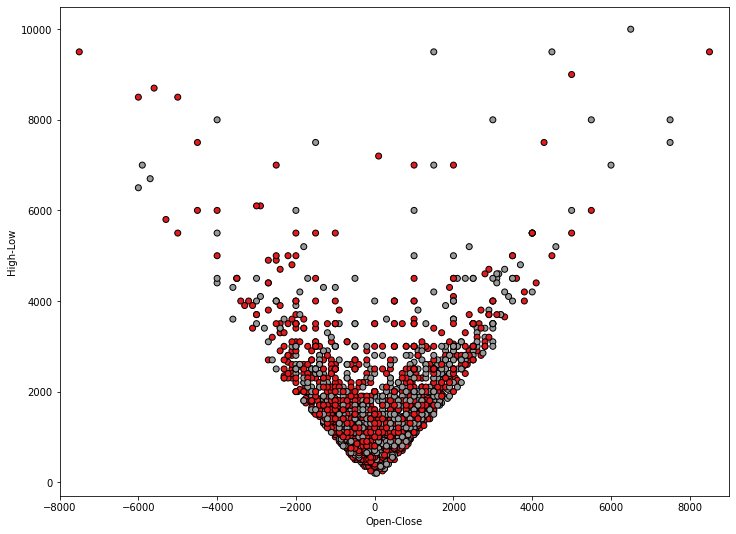

Date
2010-01-04     800
2010-01-05    1850
2010-01-06     950
2010-01-07     850
2010-01-08    1400
              ... 
2021-09-27    2000
2021-09-28    2500
2021-09-29    2300
2021-09-30    3900
2021-10-01    2500
Name: High-Low, Length: 2900, dtype: int64

In [66]:
plt.figure(figsize=(12, 9))
x_min, x_max = X['Open-Close'].min() - 500, X['Open-Close'].max() + 500
y_min, y_max = X['High-Low'].min() - 500, X['High-Low'].max() + 500
plt.scatter(X['Open-Close'], X['High-Low'], c=Y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Open-Close')
plt.ylabel('High-Low')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
X.loc[:, 'High-Low']

In [67]:
train_acc = []
test_acc = []

for n in range(1, 15):
    clf = KNeighborsClassifier(n_jobs=-1,n_neighbors=n)
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append((prediction == Y_test).mean())

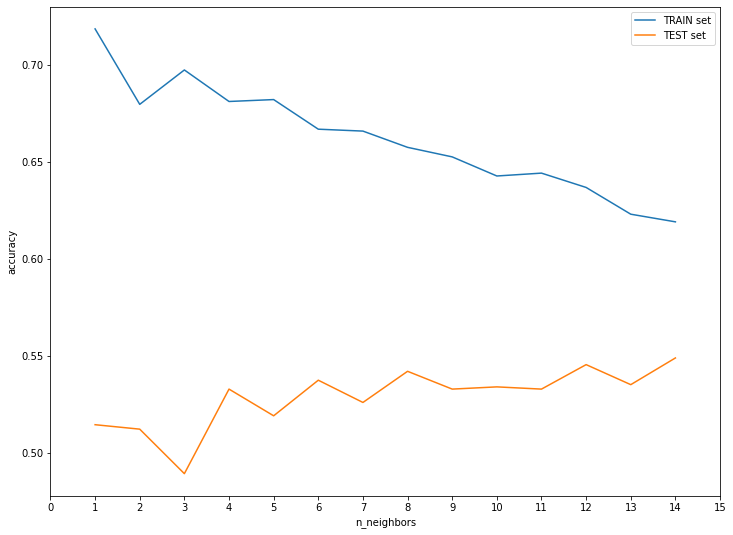

In [68]:
plt.figure(figsize=(12, 9))
plt.plot(range(1,15), train_acc, label='TRAIN set')
plt.plot(range(1,15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [69]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
print("훈련 정확도 : %.2f" % accuracy_train)
print("테스트 정확도 : %.2f" % accuracy_test)

훈련 정확도 : 0.64
테스트 정확도 : 0.55


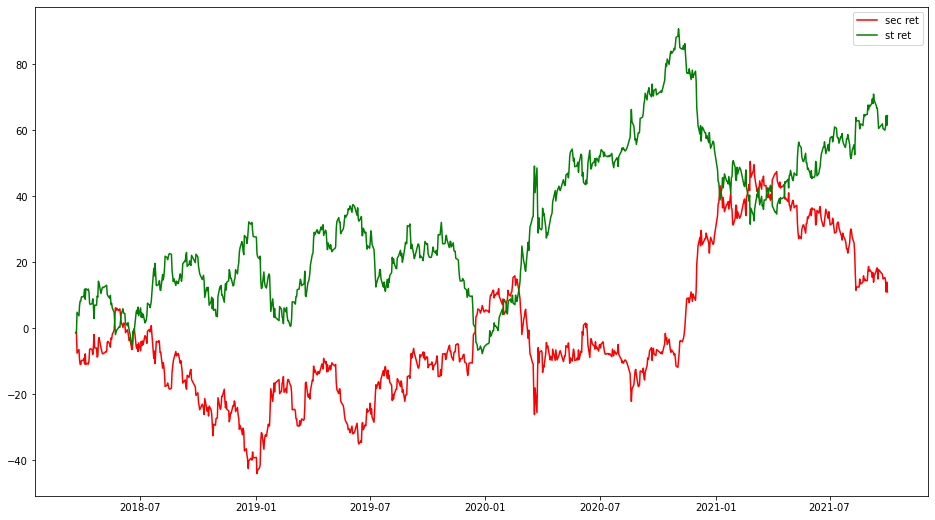

,Open,High,Low,Close,Open-Close,High-Low,Predicted_Signal,SEC_ret,st_ret
Date,,,,,,,,,
2010-01-04,23350,24150,23350,24100,-750,800,-1,NaN,NaN
2010-01-05,24500,24900,23050,23350,1150,1850,-1,-0.031615,0.031615
2010-01-06,23700,24550,23600,24550,-850,950,-1,0.050115,-0.050115
2010-01-07,25000,25200,24350,24400,600,850,-1,-0.006129,0.006129
2010-01-08,24650,24850,23450,24650,0,1400,1,0.010194,-0.010194
...,...,...,...,...,...,...,...,...,...
2021-09-27,104000,105500,103500,104500,-500,2000,-1,0.004796,-0.004796
2021-09-28,105000,105500,103000,103500,1500,2500,-1,-0.009615,0.009615
2021-09-29,101000,102000,99700,100000,1000,2300,-1,-0.034401,0.034401


In [70]:
tmp_df['Predicted_Signal'] = knn.predict(X)
tmp_df['SEC_ret'] = np.log(tmp_df['Close'] / tmp_df['Close'].shift(1))
cum_sec_ret = tmp_df[split:]['SEC_ret'].cumsum() * 100

tmp_df['st_ret'] = tmp_df['SEC_ret'] * tmp_df['Predicted_Signal'].shift(1)
cum_st_ret = tmp_df[split:]['st_ret'].cumsum() * 100

plt.figure(figsize=(16,9))
plt.plot(cum_sec_ret, color='r', label='sec ret')
plt.plot(cum_st_ret, color='g', label='st ret')
plt.legend()
plt.show()
tmp_df

In [71]:
std = cum_st_ret.std()
sharpe = (cum_st_ret - cum_sec_ret) / std
sharpe = sharpe.mean()
print('Sharpe ratio : %.2f' % sharpe)

Sharpe ratio : 1.51
